# 주제 : 한국판 뉴딜_

## 제시하는 사업 제목을 기재 할 것. 

### 1. __한국판 뉴딜 (New Deal)__ 이란 ? 

- 코로나 19 로 인해 최악의 경기 침체와 일자리 충격 등에 직면해 있는 상황에서 위기를 극복하고 코로나 이후 글로벌 경제를 선도하기 위해 
  마련된 국가 발전 전략임. 

- 20 년 4 월 22 일 제 5 차 비상 경제 회의에서 포스트 코로나 시대의 혁신 성장을 위한 대규모 국가 프로젝트로 뉴딜을 처음 언급하였으며,
  한국판 뉴딜 추진 전담 조직 (TF) 구성, 분야별 전문가 간담회, 민간제안 수렴 등을 거쳐 7 월 14 일, 제 7 차 비상경제 회의 겸 한국판 뉴딜
  국민 보고 대회를 통해 추진 계획이 발표됨. 
  
- 문재인 대통령은 국민 보고 대회 기조 연설에서 "한국판 뉴딜은 선도 국가로 도약하는 대한민국 대 전환 선언으로 추격형 경제에서 선도형 경제
  로, 탄소 의존에서 저 탄소 경제로, 불평등 사회에서 포용 사회로 대한민국을 근본적으로 바꾸어 새로운 100 년을 설계하는 것" 이라고 강조함. 

http://www.korea.kr/special/policyCurationView.do?newsId=148874860

![한국판 뉴딜](http://www.korea.kr/newsWeb/resources/temp/images/000150/%ED%95%9C%EA%B5%AD%ED%8C%90%EB%89%B4%EB%94%9C_1_1_3.jpg)

#### 1) 추격형 -> 선도형 경제  
#### 2) 탄소 의존 -> 저탄소 경제  
#### 3) 불평등 사회 -> 포용 사회  

In [4]:
## EDA (Exploratory Data Analysis) : 데이터셋을 다양한 관점에서 살펴보고 탐색하면서 인사이트를 찾는 것.

In [5]:
%matplotlib inline

import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import folium
from folium import plugins
print(folium.__version__)

import datetime as dt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import platform
import googlemaps

plt.rcParams['figure.figsize'] = [8, 4] # [width, height] (inches) # 그림 크기의 확대
pd.options.display.max_rows = 100

pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

import warnings                   # 경고 무시
warnings.filterwarnings('ignore')

0.11.0


In [6]:
# 인구

population_2014 = pd.read_csv('E:\통계 데이터 대회\data\인구\인구동향조사_출생_연간자료_A형(제공)_2014.csv', encoding = 'cp949')
population_2015 = pd.read_csv('E:\통계 데이터 대회\data\인구\인구동향조사_출생_연간자료_A형(제공)_2015.csv', encoding = 'cp949')
population_2016 = pd.read_csv('E:\통계 데이터 대회\data\인구\인구동향조사_출생_연간자료_A형(제공)_2016.csv', encoding = 'cp949')
population_2017 = pd.read_csv('E:\통계 데이터 대회\data\인구\인구동향조사_출생_연간자료_A형(제공)_2017.csv', encoding = 'cp949')
population_2018 = pd.read_csv('E:\통계 데이터 대회\data\인구\인구동향조사_출생_연간자료_A형(제공)_2018.csv', encoding = 'cp949')
population_2018

,신고날짜(년),신고날짜(월),신고날짜(일),주소지(시도),성별,혼인중의자 여부,출생일자(년),출생일자(월),출생장소,부직업,부교육정도,부연령(각세),모직업,모교육정도,모연령(각세),실제결혼(년),실제결혼(월),임신주수,다태아 여부,다태아 출산순위,출생아 체중,모 총출생아수,모 생존아수,부모 동거기간,부국적구분,부국적,모국적구분,모국적
0,2018,1,2,11,1,Y,2018,1,2,1,5,40,99,6,37,2011,10,40,1,1,2.900,2,2,6,1,NaN,1,NaN
1,2018,1,2,11,2,Y,2018,1,2,3,5,28,5,5,27,2015,12,39,1,1,2.805,2,2,2,1,NaN,1,NaN
2,2018,1,2,11,2,Y,2018,1,2,3,5,28,99,5,29,2017,8,39,1,1,2.740,1,1,0,1,NaN,1,NaN
3,2018,1,2,11,2,Y,2018,1,2,3,5,33,13,5,33,2016,2,41,1,1,3.020,1,1,1,1,NaN,1,NaN
4,2018,1,2,11,2,Y,2018,1,2,7,5,34,5,5,33,2013,11,39,1,1,3.330,2,2,4,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326817,2019,4,30,23,2,Y,2018,8,2,99,5,32,13,5,35,2015,11,0,1,1,0.000,2,2,2,3,6017.0,1,NaN
326818,2019,4,30,31,1,Y,2018,12,2,13,6,39,13,5,37,2010,11,0,1,1,0.000,2,2,8,1,NaN,1,NaN
326819,2019,4,30,31,2,Y,2018,12,2,99,6,39,13,5,37,2016,4,0,1,1,0.000,2,2,2,3,2011.0,1,NaN
326820,2019,4,30,34,1,Y,2018,3,2,13,4,29,13,5,33,2014,12,0,9,9,0.000,2,2,3,1,NaN,1,NaN


In [8]:
# 데이터 클리닝

# 결측값 확인 및 제거 (개수 파악)

population_2014.isnull().sum()

신고날짜(년)             0
신고날짜(월)             0
신고날짜(일)             0
출생자 주소지(시도)         0
성별                  0
혼인중 외의자             0
출생일자(년)             0
출생일자(월)             0
출생장소                0
부직업                 0
부교육정도               0
부연령(각세)             0
모직업                 0
모교육정도               0
모연령(각세)             0
실제결혼(년)             0
실제결혼(월)             0
임신주수                0
다태아 여부              0
다태아 출산순위            0
출생아 체중              0
모 총출생아수             0
모 생존아수              0
부모 동거기간             0
부국적구분               0
부국적            431650
모국적구분               0
모국적            420720
dtype: int64

In [9]:
population_2015.isnull().sum()

신고날짜(년)             0
신고날짜(월)             0
신고날짜(일)             0
출생자 주소지(시도)         0
성별                  0
혼인중 외의자             0
출생일자(년)             0
출생일자(월)             0
출생장소                0
부직업                 0
부교육정도               0
부연령(각세)             0
모직업                 0
모교육정도               0
모연령(각세)             0
실제결혼(년)             0
실제결혼(월)             0
임신주수                0
다태아 여부              0
다태아 출산순위            0
출생아 체중              0
모 총출생아수             0
모 생존아수              0
부모 동거기간             0
부국적구분               0
부국적            434676
모국적구분               0
모국적            425037
dtype: int64

In [10]:
population_2016.isnull().sum()

신고날짜(년)          0
신고날짜(월)          0
신고날짜(일)          0
주소지(시도)          0
성별               0
혼인중의자 여부         0
출생일자(년)          0
출생일자(월)          0
출생장소             0
부직업              0
부교육정도            0
부연령(각세)          0
모직업              0
모교육정도            0
모연령(각세)          0
실제결혼(년)          0
실제결혼(월)          0
임신주수             0
다태아 여부           0
다태아 출산순위         0
출생아 체중           0
모 총출생아수          0
모 생존아수           0
부모 동거기간          0
부국적구분            0
부국적         402259
모국적구분            0
모국적         393225
dtype: int64

In [11]:
population_2017.isnull().sum()

신고날짜(년)          0
신고날짜(월)          0
신고날짜(일)          0
주소지(시도)          0
성별               0
혼인중의자 여부         0
출생일자(년)          0
출생일자(월)          0
출생장소             0
부직업              0
부교육정도            0
부연령(각세)          0
모직업              0
모교육정도            0
모연령(각세)          0
실제결혼(년)          0
실제결혼(월)          0
임신주수             0
다태아 여부           0
다태아 출산순위         0
출생아 체중           0
모 총출생아수          0
모 생존아수           0
부모 동거기간          0
국적구분(남편)         0
국적(남편)      353875
국적구분(아내)         0
국적(아내)      345505
dtype: int64

In [12]:
population_2018.isnull().sum()

신고날짜(년)          0
신고날짜(월)          0
신고날짜(일)          0
주소지(시도)          0
성별               0
혼인중의자 여부         0
출생일자(년)          0
출생일자(월)          0
출생장소             0
부직업              0
부교육정도            0
부연령(각세)          0
모직업              0
모교육정도            0
모연령(각세)          0
실제결혼(년)          0
실제결혼(월)          0
임신주수             0
다태아 여부           0
다태아 출산순위         0
출생아 체중           0
모 총출생아수          0
모 생존아수           0
부모 동거기간          0
부국적구분            0
부국적         322202
모국적구분            0
모국적         311606
dtype: int64

In [13]:
# 년도별 출생수 비교

man_2014 = population_2014[(population_2014['성별'] == 1)]
women_2014 = population_2014[(population_2014['성별'] == 2)]
human_2014 = len(man_2014) + len(women_2014)
man_2015 = population_2015[(population_2015['성별'] == 1)]
women_2015 = population_2015[(population_2015['성별'] == 2)]
human_2015 = len(man_2015) + len(women_2015)
man_2016 = population_2016[(population_2016['성별'] == 1)]
women_2016 = population_2016[(population_2016['성별'] == 2)]
human_2016 = len(man_2016) + len(women_2016)
man_2017 = population_2017[(population_2017['성별'] == 1)]
women_2017 = population_2017[(population_2017['성별'] == 2)]
human_2017 = len(man_2017) + len(women_2017)
man_2018 = population_2018[(population_2018['성별'] == 1)]
women_2018 = population_2018[(population_2018['성별'] == 2)]
human_2018 = len(man_2018) + len(women_2018)

In [14]:
# 년도별 출생수 데이터 생성

df = pd.DataFrame({
    'man':[len(man_2014), len(man_2015), len(man_2016), len(man_2017), len(man_2018)],
    'women':[len(women_2014), len(women_2015), len(women_2016), len(women_2017), len(women_2018)]
})

In [15]:
df = df.rename(index={0:'2014',1:'2015', 2:'2016', 3:'2017', 4:'2018'})
df

,man,women
2014,223356,212079
2015,224906,213514
2016,208064,198179
2017,184308,173463
2018,167686,159136


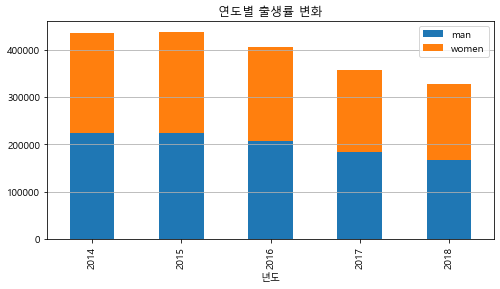

In [16]:
df.plot(kind='bar', title="연도별 출생률 변화", stacked=True) 
plt.xlabel('년도')
plt.grid(b=True, which='both', axis='y')
plt.legend()
plt.show()

In [17]:
# 연도별 출생률을 살펴보면 지속적으로 하락하고 있으며, 출생자는 남자가 여자보다 많음. (2019 년 출생자 303,100 명)

In [18]:
df['total'] = df.sum(axis=1) # 두 컬럼 값들의 합
total_2014 = df.loc['2014', 'total'] 

df['Increase/decrease rate'] = (df['total'] / (total_2014)).apply('{:.0%}'.format)
df

,man,women,total,Increase/decrease rate
2014,223356,212079,435435,100%
2015,224906,213514,438420,101%
2016,208064,198179,406243,93%
2017,184308,173463,357771,82%
2018,167686,159136,326822,75%


In [19]:
# 연도별 출생률을 살펴보면 2014 년 대비 2018 년이 25 % 하락